In [1]:
import pandas as pd
import numpy as np ,numpy.random
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
url = "C:/Users/wiem-/Downloads/"
database = pd.read_csv(url + "Perf_LS_CB.csv")

In [3]:
database.head(3)

,Date,Risque,Rdt_Predit,Rdt_Obs
0,2013-03-31 00:00:00,5.329379,4.595622,0.239655
1,2013-04-30 00:00:00,5.299356,0.559001,-1.385021
2,2013-05-31 00:00:00,9.399671,3.596897,-3.473640


In [4]:
database.tail(3)

,Date,Risque,Rdt_Predit,Rdt_Obs
74,2019-05-31 00:00:00,6.831078,2.311210,3.308621
75,2019-06-30 00:00:00,6.659702,3.108133,1.059537
76,2019-07-31 00:00:00,5.313090,1.240107,9.096064


In [5]:
# Dimension des données
database.shape

(77, 4)

In [6]:
database.dtypes

Date           object
Risque        float64
Rdt_Predit    float64
Rdt_Obs       float64
dtype: object

In [7]:
import datetime
database['Date']= pd.to_datetime(database['Date'])
database.head()

,Date,Risque,Rdt_Predit,Rdt_Obs
0,2013-03-31,5.329379,4.595622,0.239655
1,2013-04-30,5.299356,0.559001,-1.385021
2,2013-05-31,9.399671,3.596897,-3.473640
3,2013-06-30,6.618567,3.897853,-0.342378
4,2013-07-31,7.479401,5.401378,2.403847


In [8]:
Missing_values=["NaN","N/A"]
print(database.isnull().sum ())

Date          0
Risque        0
Rdt_Predit    0
Rdt_Obs       0
dtype: int64


### Analyse univariée et Visualisation des données

### Statistiques descriptives

In [9]:
database.describe()

,Risque,Rdt_Predit,Rdt_Obs
count,77.000000,77.000000,77.000000
mean,6.777599,2.461687,1.163313
std,2.833160,2.289196,7.267722
min,2.994478,-1.440484,-21.692506
25%,4.594559,0.610764,-2.347533
50%,6.550123,2.025067,0.327529
75%,8.729665,3.876291,4.354547
max,14.379234,10.040696,21.731381


In [10]:
# Calcul de coefficient d'asymétie
from scipy.stats import kurtosis
from scipy.stats import skew
skewness= database.skew() 
kurtosis= database.kurtosis()
df=pd.DataFrame({'skewness':skewness, 'kurtosis': kurtosis})
df

,skewness,kurtosis
Risque,0.602965,-0.508052
Rdt_Predit,1.088531,1.288439
Rdt_Obs,-0.071840,2.061193


Text(0.5, 1.0, 'Boîtes à moustache de la composition du portefeuille Long_Short')

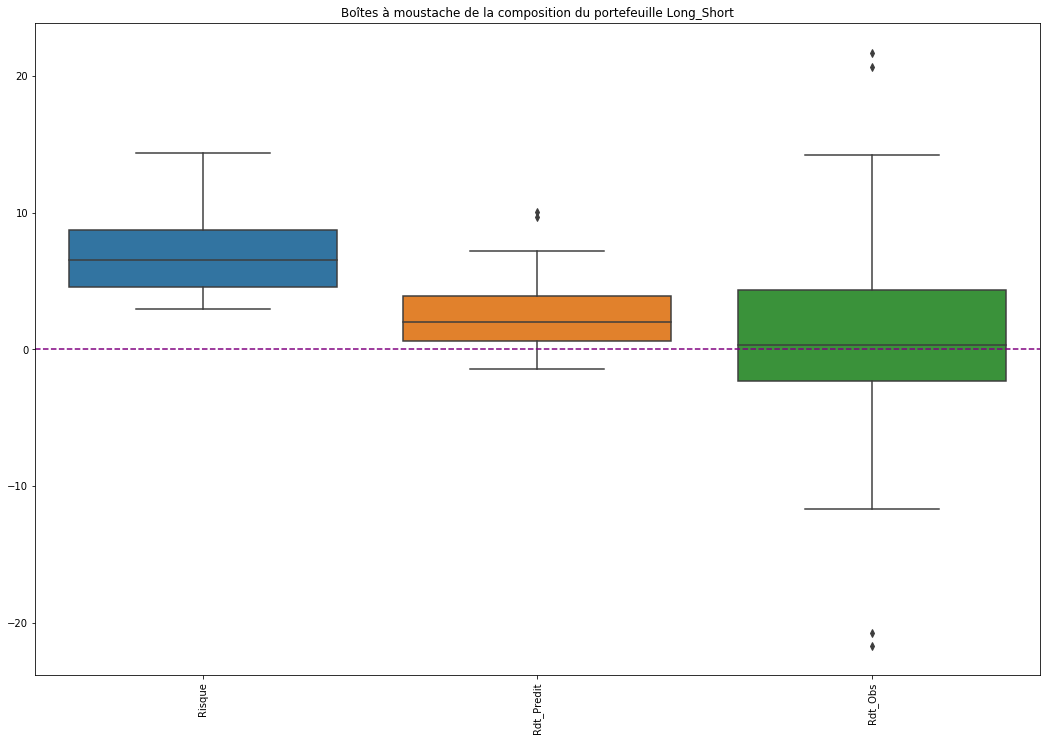

In [11]:
fig, ax = plt.subplots(figsize=(18,12))
sns.boxplot(data=database.iloc[:,1:4])
#sns.swarmplot(x='Titres', y='Return', data=db, color="grey")
plt.axhline(0, ls='--',color="purple")
plt.xticks(rotation=90)
plt.title("Boîtes à moustache de la composition du portefeuille Long_Short")

### Histogrammes

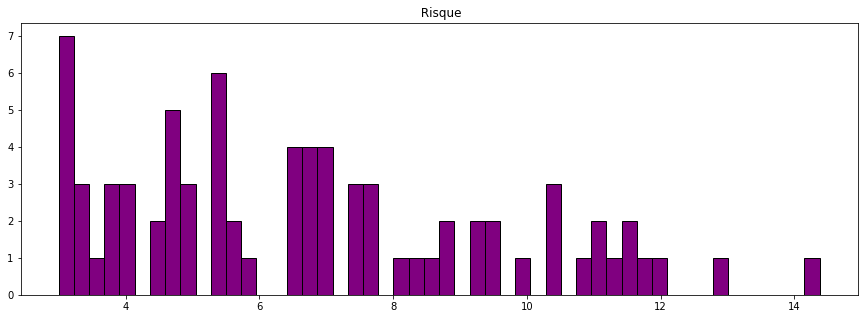

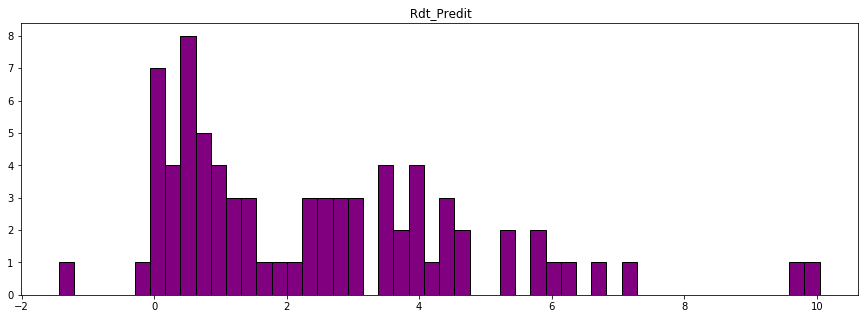

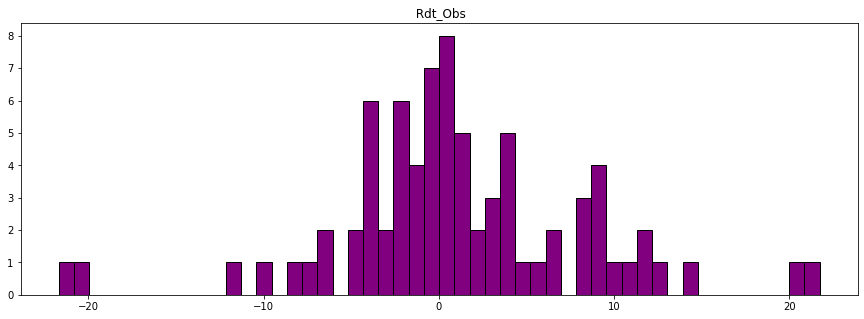

In [12]:
for i in list(database.columns[1:4]):
    fig = plt.figure(figsize=(15,5))
    plt.hist(database[i], bins=50,color='purple',edgecolor = 'black')
    plt.title(" {}".format(i))


### Test de normalité Jarques-Bera

In [13]:
# normality test
from scipy.stats import shapiro
# interpret
for i in list(database.columns[1:4]):
    stat, p = shapiro(database[i])
    print(i,':', 'Statistics=%.3f, p=%.3f' % (stat, p))
    print(50*'*')

Risque : Statistics=0.940, p=0.001
**************************************************
Rdt_Predit : Statistics=0.911, p=0.000
**************************************************
Rdt_Obs : Statistics=0.951, p=0.005
**************************************************


### Trajectoire

C:\Users\wiem-\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


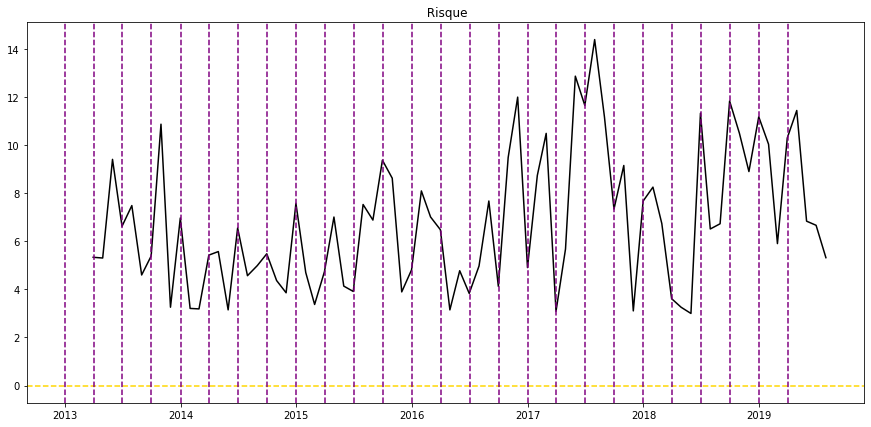

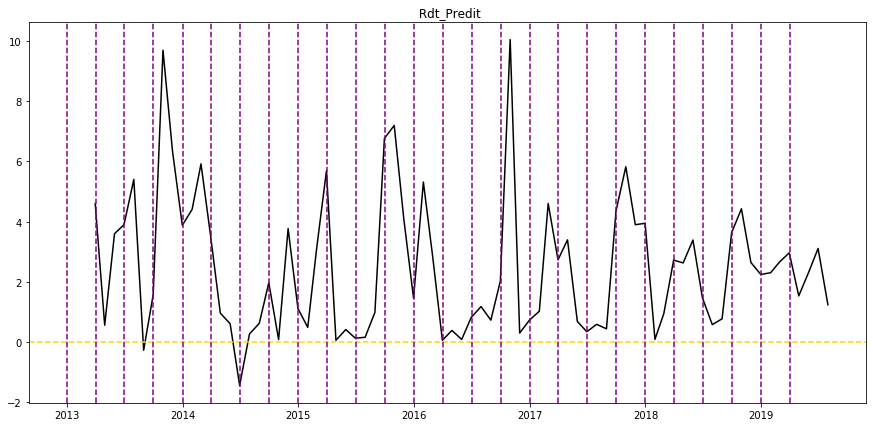

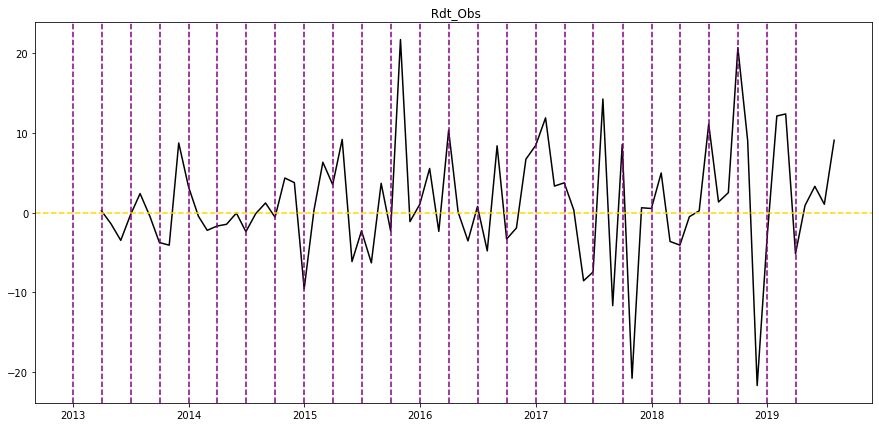

In [14]:
for i in list(database.columns[1:4]):
    fig = plt.figure(figsize=(15,7))
    plt.plot(database["Date"] , database[i],color='black')
    plt.title(" {}".format(i))
    plt.axhline(0, ls='--',color="gold")
    for i in np.arange(np.datetime64("2013-03-31"), np.datetime64("2019-08-31"), dtype='datetime64[3M]'):
        plt.axvline(i, ls='--',color="purple")

Text(0.5, 1.0, 'Rendements Observés et Prédits')

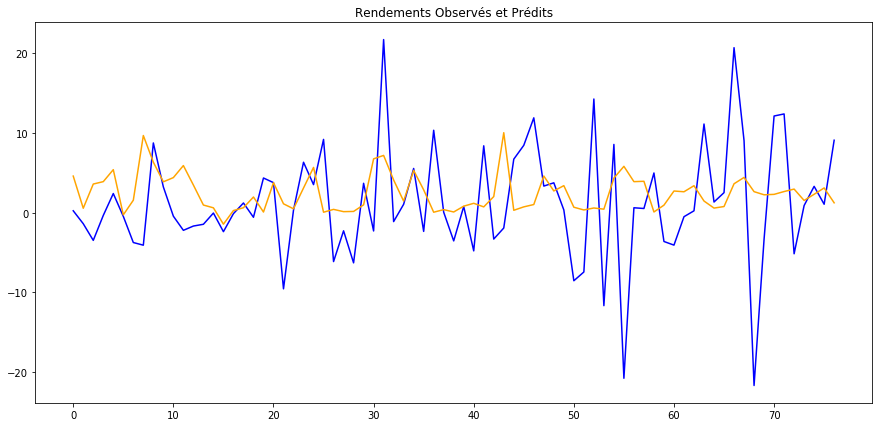

In [16]:
fig = plt.figure(figsize=(15,7))
plt.plot(database["Rdt_Obs"], "k",color="blue")
plt.plot(database["Rdt_Predit"], "k",color="orange")
plt.title("Rendements Observés et Prédits")

### Corrélations 

In [17]:
corr = database.corr()
corr.style.background_gradient(cmap='PuOr')

,Risque,Rdt_Predit,Rdt_Obs
Risque,1,0.0957172,0.067447
Rdt_Predit,0.0957172,1,0.0390666
Rdt_Obs,0.067447,0.0390666,1


### Autocorrélations

#### Calcul des autocorrélations  des rendements observés

In [18]:
from statsmodels.tsa.stattools import acf
cor = acf(database["Rdt_Obs"])
print("Autocorrélations des rendements observés")
print (cor)

Autocorrélations des rendements observés
[ 1.         -0.09666132 -0.10488112 -0.16219654  0.08507221  0.0954069
 -0.01654046 -0.04652043 -0.02675056 -0.03053161 -0.04978864 -0.03544922
 -0.00181062  0.12641044 -0.03780403  0.03150153 -0.13416035  0.0500345
  0.04952178 -0.0695356  -0.08942629  0.06496008  0.01541283  0.01969559
 -0.18501143  0.0553231  -0.05061622  0.06901376 -0.05587773  0.06394522
  0.01197    -0.07633834  0.02190294  0.00554014  0.01317785  0.08934783
 -0.00691407 -0.09939231  0.00693052  0.00746791  0.09897252]


C:\Users\wiem-\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [19]:
len(cor)

41

Text(0.5, 1.0, 'Autocorrélation partielle des rendements observés')

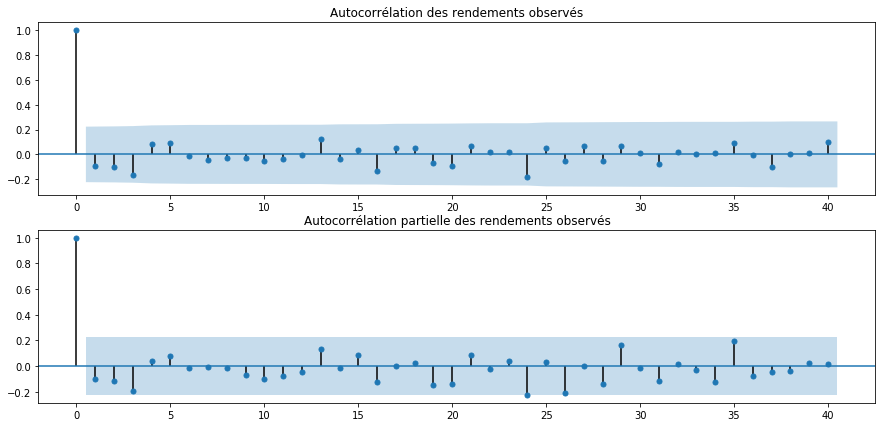

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrélation des rendements 
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(database["Rdt_Obs"], lags=40, ax=ax1)
plt.title("Autocorrélation des rendements observés") 

# Autocorrélation partielle des rendements 
ax2 = fig.add_subplot(212)
fig = plot_pacf(database["Rdt_Obs"], lags=40, ax=ax2)
plt.title("Autocorrélation partielle des rendements observés") 

#### Calcul des autocorrélations  des rendements prédits

In [21]:
from statsmodels.tsa.stattools import acf
cor = acf(database["Rdt_Predit"])
print("Autocorrélations des rendements prédits")
print (cor)

Autocorrélations des rendements prédits
[ 1.          0.27614685 -0.06407881 -0.0603713   0.0476243  -0.14876023
 -0.11498824 -0.06458958 -0.07938797 -0.11416128 -0.09899382  0.05567393
  0.20438499  0.17774474 -0.04375741 -0.24041219 -0.15860207 -0.08730493
 -0.17133243 -0.00160682  0.05034186 -0.07668413 -0.00228641  0.32236193
  0.2507887   0.08581717 -0.01616478  0.00260601 -0.13904515 -0.19461314
 -0.10530847  0.05290313  0.08108864 -0.0894068  -0.09038483  0.06103923
  0.2016334   0.01306536 -0.07701228  0.00907471 -0.01390816]


Text(0.5, 1.0, 'Autocorrélation partielle des rendements prédits')

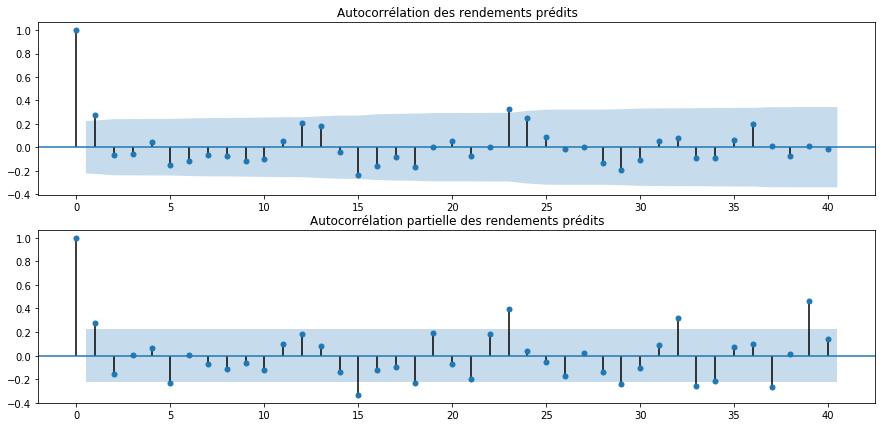

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrélation des rendements 
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(database["Rdt_Predit"], lags=40, ax=ax1)
plt.title("Autocorrélation des rendements prédits") 

# Autocorrélation partielle des rendements 
ax2 = fig.add_subplot(212)
fig = plot_pacf(database["Rdt_Predit"], lags=40, ax=ax2)
plt.title("Autocorrélation partielle des rendements prédits") 

### Calcul des Value at risk

##### Historical Simulation approach:
We calculate the VaR for 90, 95, and 99 confidence levels. This function has three parameters: probability, mean, and standard deviation. In probability, we use 0.1, 0.05, 0.01 respectively for the VaR(90), VaR(95), and VaR(99).

#### Rendements observés

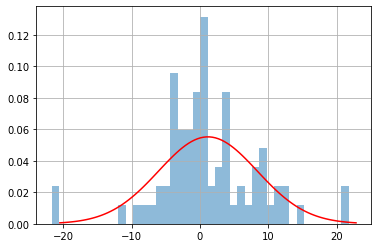

In [24]:
from scipy.stats import norm 
mean = np.mean(database['Rdt_Obs'])
std_dev = np.std(database['Rdt_Obs'])
database['Rdt_Obs'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,norm.pdf(x, mean, std_dev), "r")
plt.show()

In [25]:
#VaR Computation 
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 90% Confidence Level:   ', VaR_90)
print('VaR 95% Confidence Level:   ', VaR_95)
print('VaR 99% Confidence Level:   ', VaR_99)

VaR 90% Confidence Level:    -8.089969891583994
VaR 95% Confidence Level:    -10.71314707612635
VaR 99% Confidence Level:    -15.633791218466163


#### Rendements prédits

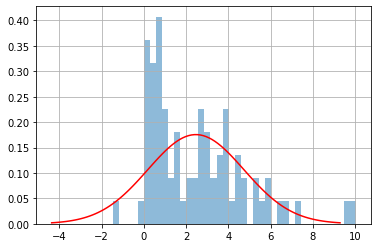

In [26]:
from scipy.stats import norm
mean = np.mean(database["Rdt_Predit"])
std_dev = np.std(database["Rdt_Predit"])
database["Rdt_Predit"].hist(bins=40,normed=True, histtype='stepfilled',alpha=0.5)
x= np.linspace(mean-3*std_dev,mean+3*std_dev,100)
plt.plot(x,norm.pdf(x,mean,std_dev),"r")
plt.show()

In [27]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 90% Confidence Level:   ', VaR_90)
print('VaR 95% Confidence Level:   ', VaR_95)
print('VaR 99% Confidence Level:   ', VaR_99)

VaR 90% Confidence Level:    -0.452923005337698
VaR 95% Confidence Level:    -1.2791744096354285
VaR 99% Confidence Level:    -2.8290846317186458


In [28]:
database

,Date,Risque,Rdt_Predit,Rdt_Obs
0,2013-03-31,5.329379,4.595622,0.239655
1,2013-04-30,5.299356,0.559001,-1.385021
2,2013-05-31,9.399671,3.596897,-3.473640
3,2013-06-30,6.618567,3.897853,-0.342378
4,2013-07-31,7.479401,5.401378,2.403847
...,...,...,...,...
72,2019-03-31,10.287463,2.963192,-5.156495
73,2019-04-30,11.432145,1.533477,0.898638
74,2019-05-31,6.831078,2.311210,3.308621
75,2019-06-30,6.659702,3.108133,1.059537


#### Rendements observés moyens, volatiles et autocorrélés sur 36 périodes glissantes

In [29]:
data=pd.DataFrame()
data['Meanrolling']= database['Rdt_Obs'].rolling(36).mean()
data['Stdrolling']= database['Rdt_Obs'].rolling(36).std()
data['Skewrolling']= database['Rdt_Obs'].rolling(36).skew()
data['Kurtrolling']= database['Rdt_Obs'].rolling(36).kurt()
df=data.dropna()
df

,Meanrolling,Stdrolling,Skewrolling,Kurtrolling
35,0.638610,5.384761,1.719813,5.867047
36,0.919404,5.621710,1.508469,4.366562
37,0.959535,5.609934,1.497253,4.381583
38,0.957701,5.611435,1.496413,4.376389
39,0.988770,5.607126,1.482641,4.362777
40,0.788853,5.683019,1.503494,4.227465
41,1.034832,5.817492,1.335166,3.390585
42,1.046945,5.807702,1.339511,3.418138
43,1.106825,5.764299,1.354126,3.539357
44,1.050241,5.696679,1.390176,3.851685


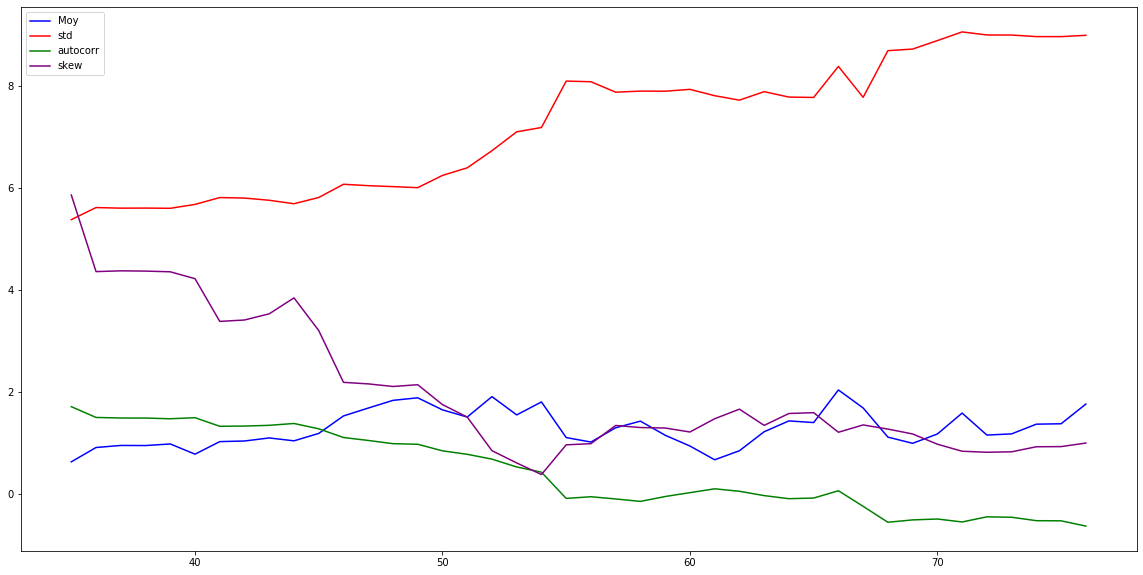

In [30]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data["Meanrolling"].values,c="blue")
plt.plot(data.index,data["Stdrolling"].values,c="red")
plt.plot(data.index,data["Skewrolling"].values,c="green")
plt.plot(data.index,data["Kurtrolling"].values,c="purple")
    
plt.legend(("Moy","std","autocorr","skew","kurt"))
plt.show()

#### Rendements prédits moyens, volatiles et autocorrélés sur 36 périodes glissantes

In [31]:
data=pd.DataFrame()
data['Meanrolling']= database['Rdt_Predit'].rolling(36).mean()
data['Stdrolling']= database['Rdt_Predit'].rolling(36).std()
data['Skewrolling']= database['Rdt_Predit'].rolling(36).skew()
data['Kurtrolling']= database['Rdt_Predit'].rolling(36).kurt()
df=data.dropna()
df

,Meanrolling,Stdrolling,Skewrolling,Kurtrolling
35,2.770099,2.618342,0.614292,-0.263364
36,2.644101,2.637056,0.710314,-0.181952
37,2.639300,2.641115,0.708801,-0.190226
38,2.541868,2.669327,0.774791,-0.173574
39,2.456322,2.673972,0.860369,-0.075308
40,2.339046,2.633392,0.996554,0.260275
41,2.366809,2.610262,1.012624,0.309195
42,2.379547,2.607362,1.001294,0.302768
43,2.389339,2.636097,1.054968,0.547161
44,2.221483,2.568581,1.221559,1.116893


In [32]:
len(df)

42

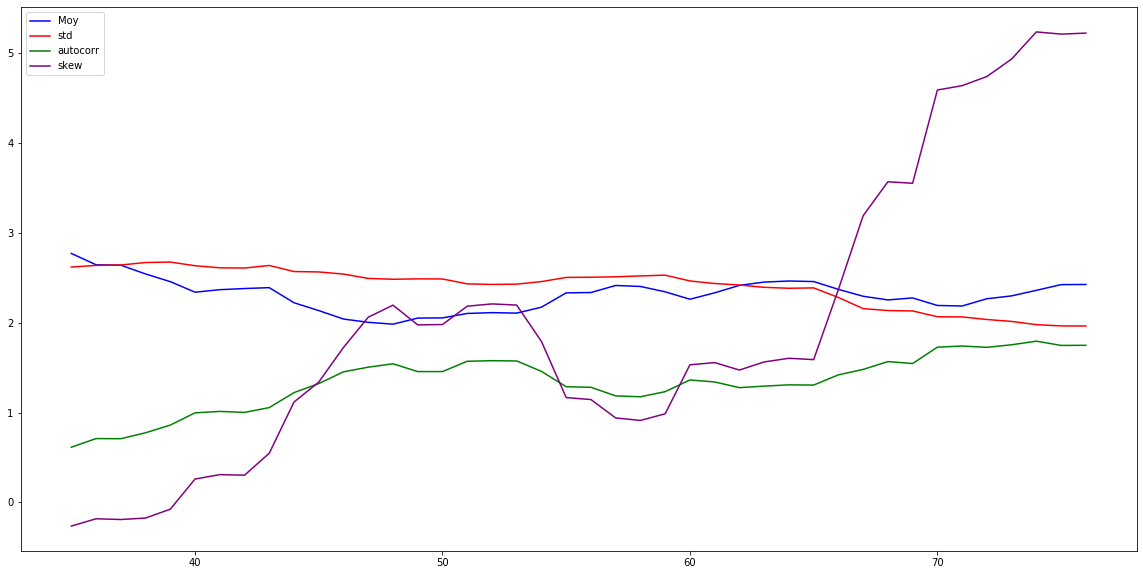

In [33]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data["Meanrolling"].values,c="blue")
plt.plot(data.index,data["Stdrolling"].values,c="red")
plt.plot(data.index,data["Skewrolling"].values,c="green")
plt.plot(data.index,data["Kurtrolling"].values,c="purple")
    
plt.legend(("Moy","std","autocorr","skew","kurt"))
plt.show()